## Objective

Create 2 conditional edges

In [59]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [60]:
class AgentState(TypedDict): 
    num1: int
    operation1: str
    num2: int
    mid_result: int
    
    num3: int
    operation2: str
    final_result: int

In [61]:
def add1(state: AgentState) -> AgentState:
    """
    Node that performs an addition operation
    """

    state["mid_result"] = state["num1"] + state["num2"]

    return state

In [62]:
def subtract1(state: AgentState) -> AgentState:
    """
    Node that performs an subtraction operation
    """

    state["mid_result"] = state["num1"] - state["num2"]

    return state

In [63]:
def router1(state: AgentState) -> AgentState:
    """
    The first router that decides the next move
    """

    if state["operation1"] == "+":
        return "addition_operation1"
    elif state["operation1"] == "-":
        return "subtraction_operation1"

In [64]:
def add2(state: AgentState) -> AgentState:
    """
    Node that performs an addition operation
    """

    state["final_result"] = state["mid_result"] + state["num3"]

    return state

In [65]:
def subtract2(state: AgentState) -> AgentState:
    """
    Node that performs an subtraction operation
    """

    state["final_result"] = state["mid_result"] - state["num3"]

    return state

In [66]:
def router2(state: AgentState) -> AgentState:
    """
    The second router that decides the next move
    """

    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [67]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", add1)
graph.add_node("subtract_node1", subtract1)
graph.add_node("router1", lambda state:state)

graph.add_node("add_node2", add2)
graph.add_node("subtract_node2", subtract2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    router1,
    {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "subtract_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    router2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

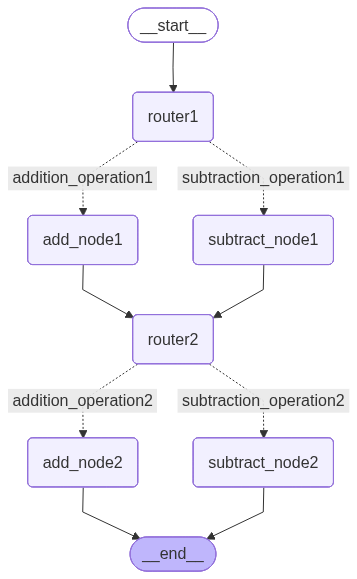

In [68]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [73]:
result = AgentState(num1=10, operation1="-", num2=5, num3=7, operation2="+")

In [74]:
app.invoke(result)

{'num1': 10,
 'operation1': '-',
 'num2': 5,
 'mid_result': 5,
 'num3': 7,
 'operation2': '+',
 'final_result': 12}